## **Social Factor Distribution Checks**
### County vs Block Group

This notebook is a sanity-check / distribution check for the socio-political variables used in the analysis. It compares County-level vs Block-Group-level distributions using KDE plots for:

- Income (USD)
- Education: HS only and Graduate/Professional only (percent of population, 0–100)
- Race: Black and Asian shares (percent of population, 0–100)
- Unemployment rate (percent, 0–100)

In [46]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings
import re

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [33]:
basepath = "../data/"

In [34]:
suitability_county = pd.read_csv(basepath + "suitability_scores/suitability_scores_county.csv", dtype={"GEOID": str})
suitability_block_group = pd.read_csv(basepath + "suitability_scores/suitability_scores_bg.csv", dtype={"GEOID": str})
project_suitability = pd.read_csv(basepath + "suitability_scores/suitability_scores_project.csv", dtype={"GEOID": str})

drop_cols = ["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"]
project_suitability = project_suitability.drop(columns=[c for c in drop_cols if c in project_suitability.columns], errors="ignore")

display(suitability_county.head())
display(suitability_block_group.head())
display(project_suitability.head())

,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,County Name,State
0,15.0,91.547835,33.748285,91.029530,98.634118,53.241671,67.860969,Ballard,Kentucky
1,15.0,99.583685,82.840678,71.723980,96.682895,60.582990,85.691192,Bourbon,Kentucky
2,15.0,99.896136,39.236428,42.759798,98.239510,50.000000,61.839634,Butler,Kentucky
3,15.0,97.733883,29.826520,11.827322,93.352800,52.380053,56.737948,Estill,Kentucky
4,15.0,98.000821,49.732293,32.705892,99.466845,50.000000,71.555286,Fleming,Kentucky


,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,County Name,State,GEOID,TRACTCE,BLKGRPCE
0,20.000000,93.000000,92.000000,64.900000,10.000000,100.000000,67.600000,Russell,Alabama,011130303001,30300,1
1,90.000000,49.286809,68.606352,31.818498,99.692854,74.398245,86.935297,Mohave,Arizona,040159534062,953406,2
2,85.294525,94.656059,8.829808,61.149437,100.000000,50.000000,66.933254,Apache,Arizona,040019450021,945002,1
3,90.000000,99.765625,72.734375,99.687500,14.531250,50.000000,72.453125,Yuma,Arizona,040270003012,301,2
4,15.000000,100.000000,44.137931,23.922414,10.000000,50.000000,60.275862,Benton,Arkansas,050070208033,20803,3


,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,geometry,Wattage,GEOID
0,5.0,76.162141,66.126850,78.113303,11.896879,77.089991,66.794574,POINT Z (-70.9739 42.450000000000074 0),2.1,250092072001
1,90.0,63.037447,53.765807,58.354083,100.000000,78.436428,90.089109,POINT Z (-116.82762700000005 34.86335600000007...,20.0,060710103004
2,90.0,63.037447,53.765807,58.354083,100.000000,78.436428,90.089109,POINT Z (-116.82762700000005 34.86335600000007...,13.8,060710103004
3,90.0,57.264974,43.303598,96.515538,100.000000,55.480345,90.635232,POINT Z (-117.35630000000009 35.03080000000018 0),80.0,060710116021
4,90.0,58.406039,43.688854,95.235859,100.000000,53.526615,90.957259,POINT Z (-117.33800000000005 35.0330000000001 0),88.0,060710116021


In [35]:
bg_income = pd.read_csv(basepath + "block_group_clean/income_bg.csv")
bg_edu    = pd.read_csv(basepath + "block_group_clean/education_bg.csv")
bg_unemp  = pd.read_csv(basepath + "block_group_clean/unemployment_bg.csv")

# Race: race_percent_bg.csv
try:
    bg_race = pd.read_csv(basepath + "block_group_clean/race_percent_bg.csv")
    race_source = "race_percent_bg.csv"
except FileNotFoundError:
    bg_race = pd.read_csv(basepath + "block_group_clean/race_bg.csv")
    race_source = "race_bg.csv"

print("Using BG race file:", race_source)

# County merged social factors
cty_social = pd.read_csv(basepath + "county_clean/social_factors_merged.csv")

print("bg_income cols:", list(bg_income.columns))
print("bg_edu cols:", list(bg_edu.columns))
print("bg_unemp cols:", list(bg_unemp.columns))
print("bg_race cols:", list(bg_race.columns))
print("cty_social cols:", list(cty_social.columns))

Using BG race file: race_percent_bg.csv
bg_income cols: ['Median Household Income', 'State', 'County', 'Tract', 'Block', 'County Name', 'State Name']
bg_edu cols: ['State', 'County', 'Tract', 'Block', 'less_than_9th_grade', 'grade_9th_to_12th_no_diploma', 'high_school_graduate', 'some_college_no_degree', 'associate_degree', 'bachelor_degree', 'graduate_degree', 'highschool_or_higher', 'bach_or_higher']
bg_unemp cols: ['Total', 'In labor force', 'Civilian labor force', 'Employed', 'Unemployed', 'Armed Forces', 'Not in labor force', 'State', 'County', 'Tract', 'Block', 'County Name', 'State Name', 'Unemployment Rate']
bg_race cols: ['State', 'County', 'Tract', 'Block', 'State Name', 'County Name', 'Total Population', 'Total One Race Percentage', 'White Only Percentage', 'African American Only Percentage', 'American Indian and Alaska Native Only Percentage', 'Asian Only Percentage', 'Native Hawaiian and Other Pacific Islander Only Percentage', 'Others Only Percentage', 'Total Mixed Raced 

In [36]:
# GEOID helpers
def pad_str(series, width):
    return series.astype(str).str.zfill(width)

def ensure_geoid_bg(df, name):
    df.columns = [c.strip() for c in df.columns]

    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)
        return df

    def has_cols(cols):
        return all(c in df.columns for c in cols)

    if has_cols(["State", "County", "Tract", "Block"]):
        df["GEOID"] = (
            df["State"].astype(str).str.zfill(2) +
            df["County"].astype(str).str.zfill(3) +
            df["Tract"].astype(str).str.zfill(6) +
            df["Block"].astype(str).str.zfill(1)
        )
        return df

    if has_cols(["State", "County", "Tract", "Block Group"]):
        df["GEOID"] = (
            df["State"].astype(str).str.zfill(2) +
            df["County"].astype(str).str.zfill(3) +
            df["Tract"].astype(str).str.zfill(6) +
            df["Block Group"].astype(str).str.zfill(1)
        )
        return df

    if has_cols(["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"]):
        df["GEOID"] = (
            df["STATEFP"].astype(str).str.zfill(2) +
            df["COUNTYFP"].astype(str).str.zfill(3) +
            df["TRACTCE"].astype(str).str.zfill(6) +
            df["BLKGRPCE"].astype(str).str.zfill(1)
        )
        return df

    print(f"[ERROR] Couldn't find GEOID-like columns in {name}. Columns are:")
    print(list(df.columns))
    raise KeyError(f"No GEOID column found in {name}")


def ensure_geoid_county(df, name):
    df.columns = [c.strip() for c in df.columns]

    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)
        return df

    for c in ["FIPS", "fips", "CountyFIPS", "COUNTY_FIPS", "county_fips", "GEOIDFQ"]:
        if c in df.columns:
            df["GEOID"] = df[c].astype(str).str.replace("US", "", regex=False).str.zfill(5)
            return df

    # split numeric state/county
    state_col = None
    county_col = None
    for c in ["STATEFP", "statefp", "State", "STATE"]:
        if c in df.columns:
            state_col = c
            break
    for c in ["COUNTYFP", "countyfp", "County", "COUNTY"]:
        if c in df.columns:
            county_col = c
            break

    if state_col is not None and county_col is not None:
        df["GEOID"] = pad_str(df[state_col], 2) + pad_str(df[county_col], 3)
        return df

    print(f"[ERROR] Can't create county GEOID for {name}. Columns:")
    print(list(df.columns))
    raise KeyError(f"No GEOID or recognizable county ID columns in {name}")

# Apply GEOID fixes
bg_income = ensure_geoid_bg(bg_income, "bg_income")
bg_edu    = ensure_geoid_bg(bg_edu, "bg_edu")
bg_race   = ensure_geoid_bg(bg_race, "bg_race")
bg_unemp  = ensure_geoid_bg(bg_unemp, "bg_unemp")

cty_social = ensure_geoid_county(cty_social, "cty_social")

for df in [suitability_county, suitability_block_group, project_suitability]:
    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)

print("BG GEOID example:", bg_income["GEOID"].iloc[0])
print("County GEOID example:", cty_social["GEOID"].iloc[0])


BG GEOID example: 010010201001
County GEOID example: 1001.0


In [37]:
# Column detection helpers 
def normalize_colname(s):
    return re.sub(r"[^a-z0-9]+", "_", str(s).lower()).strip("_")

def pick_best_column(df, include_keywords, exclude_keywords=None):
    if exclude_keywords is None:
        exclude_keywords = []
    cols = list(df.columns)

    scored = []
    for c in cols:
        c_norm = normalize_colname(c)
        inc_score = sum(1 for kw in include_keywords if kw in c_norm)
        exc_penalty = sum(1 for kw in exclude_keywords if kw in c_norm)
        score = inc_score - 2 * exc_penalty
        if inc_score > 0:  # must match at least one include keyword
            scored.append((score, inc_score, -exc_penalty, c))

    if not scored:
        return None

    scored.sort(reverse=True)
    return scored[0][3]

def report_col(name, col):
    if col is None:
        print(f"[WARN] Could not detect {name}")
    else:
        print(f"Detected {name}: {col}")

In [38]:
# Fixed column choices

# County (from county_clean/social_factors_merged.csv)
cty_income_col = "Median Income"
cty_hs_col     = "25+ High school graduate"                 # NOT "or higher"
cty_grad_col   = "25+ Graduate or professional degree"      # NOT "bachelor or higher"
cty_black_col  = "Black/African American"
cty_asian_col  = "Asian"
cty_unemp_col  = "Unemployment Rate"

# Block group (from block_group_clean/*.csv)
bg_income_col = "Median Household Income"

# HS-only column exists in bg_edu as: "high_school_graduate"
bg_hs_col   = "high_school_graduate"

# Grad-only column exists in bg_edu as: "graduate_degree"
bg_grad_col = "graduate_degree"

# BG race percentages (these are decimals 0–1 in race_percent_bg.csv)
bg_black_col = "African American Only Percentage"
bg_asian_col = "Asian Only Percentage"

# BG unemployment (decimal 0–1 in unemployment_bg.csv)
bg_unemp_col = "Unemployment Rate"

for name, df, col in [
    ("cty_income", cty_social, cty_income_col),
    ("cty_hs", cty_social, cty_hs_col),
    ("cty_grad", cty_social, cty_grad_col),
    ("bg_income", bg_income, bg_income_col),
    ("bg_hs", bg_edu, bg_hs_col),
    ("bg_grad", bg_edu, bg_grad_col),
    ("bg_black", bg_race, bg_black_col),
    ("bg_asian", bg_race, bg_asian_col),
    ("bg_unemp", bg_unemp, bg_unemp_col),
]:
    if col not in df.columns:
        print(f"[ERROR] Missing column for {name}: {col}")
    else:
        print(f"[OK] {name}: {col}")

[OK] cty_income: Median Income
[OK] cty_hs: 25+ High school graduate
[OK] cty_grad: 25+ Graduate or professional degree
[OK] bg_income: Median Household Income
[OK] bg_hs: high_school_graduate
[OK] bg_grad: graduate_degree
[OK] bg_black: African American Only Percentage
[OK] bg_asian: Asian Only Percentage
[OK] bg_unemp: Unemployment Rate


In [39]:
# Build unified social tables for plotting
required_bg = [bg_income_col, bg_hs_col, bg_grad_col, bg_black_col, bg_asian_col, bg_unemp_col]
required_cty = [cty_income_col, cty_hs_col, cty_grad_col, cty_black_col, cty_asian_col, cty_unemp_col]

if any(c is None for c in required_bg):
    missing = [c for c in ["income","hs","grad","black","asian","unemp"] if required_bg[["income","hs","grad","black","asian","unemp"].index(c)] is None]
    print("[WARN] BG missing some columns. Check detected columns above.")
if any(c is None for c in required_cty):
    print("[WARN] County missing some columns. Check detected columns above.")

# Build unified social tables for plotting
bg_social = bg_income[["GEOID", bg_income_col]].copy()
bg_social = bg_social.merge(bg_edu[["GEOID", bg_hs_col, bg_grad_col]], on="GEOID", how="left")
bg_social = bg_social.merge(bg_race[["GEOID", bg_black_col, bg_asian_col]], on="GEOID", how="left")
bg_social = bg_social.merge(bg_unemp[["GEOID", bg_unemp_col]], on="GEOID", how="left")

bg_social = bg_social.rename(columns={
    bg_income_col: "Income",
    bg_hs_col: "HS_Education",
    bg_grad_col: "Grad_Education",
    bg_black_col: "Black",
    bg_asian_col: "Asian",
    bg_unemp_col: "Unemployment"
})

cty_social_small = cty_social[["GEOID", cty_income_col, cty_hs_col, cty_grad_col, cty_black_col, cty_asian_col, cty_unemp_col]].copy()
cty_social_small = cty_social_small.rename(columns={
    cty_income_col: "Income",
    cty_hs_col: "HS_Education",
    cty_grad_col: "Grad_Education",
    cty_black_col: "Black",
    cty_asian_col: "Asian",
    cty_unemp_col: "Unemployment"
})

# Convert race columns from 0–1 decimals to 0–100 percent (BG + County)
for df_ in [bg_social, cty_social_small]:
    for col in ["Black", "Asian"]:
        if col in df_.columns:
            s = pd.to_numeric(df_[col], errors="coerce")
            # only convert if it still looks like a fraction
            if s.max(skipna=True) <= 1.5:
                df_[col] = s * 100

display(bg_social.head())
display(cty_social_small.head())

,GEOID,Income,HS_Education,Grad_Education,Black,Asian,Unemployment
0,010010201001,42204,36.170213,13.002364,12.695652,0.869565,0.027344
1,010010201002,62022,31.435350,6.880190,11.666667,0.250000,0.024896
2,010010202001,58971,49.299065,7.710280,63.141684,0.718686,0.033835
3,010010202002,57063,51.671442,7.354346,45.235893,0.462535,0.061674
4,010010203001,84646,33.548041,7.729469,20.992848,0.546908,0.021739


,GEOID,Income,HS_Education,Grad_Education,Black,Asian,Unemployment
0,1001.0,62660,32.8,11.7,19.304481,1.484568,2.8
1,1003.0,64346,27.4,11.8,7.766852,0.875448,3.7
2,1005.0,36422,36.7,4.4,46.980930,0.408357,8.6
3,1007.0,54277,43.9,4.0,19.692280,0.116629,9.7
4,1009.0,52830,35.1,5.6,1.396828,0.294247,6.0


In [40]:
# # Project-level proxy 
# # Proxy social factors by GEOID join to BG.
# project_social = None
# if "GEOID" in project_suitability.columns:
#     project_social = project_suitability[["GEOID"]].drop_duplicates().merge(bg_social, on="GEOID", how="left")
#     overlap = project_social["Income"].notna().mean()
#     print("Project-social proxy coverage (fraction with non-null Income after BG join):", overlap)

# display(project_social.head() if project_social is not None else pd.DataFrame({"note":["No project_suitability GEOID found."]}))

In [41]:
display(cty_social_small.describe())
display(bg_social.describe())
# if project_social is not None:
#     display(project_social.describe())

,HS_Education,Grad_Education,Black,Asian,Unemployment
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,33.941243,8.164134,8.671075,1.334867,5.196748
std,7.503094,4.720739,14.085064,2.573158,2.582848
min,6.500000,0.000000,0.000000,0.000000,0.000000
25%,29.200000,5.100000,0.501750,0.317774,3.600000
50%,34.200000,6.800000,2.031984,0.542127,4.900000
75%,39.200000,9.900000,9.893034,1.218718,6.300000
max,53.400000,49.100000,87.126437,38.910032,32.400000


,HS_Education,Grad_Education,Black,Asian,Unemployment
count,240091.000000,240091.000000,238235.000000,238235.000000,239770.000000
mean,27.315028,12.820371,12.923637,5.243623,0.056332
std,14.262902,12.289900,20.723713,9.794008,0.068561
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.666667,3.860712,1.092233,0.493883,0.008881
50%,26.915521,9.066667,3.889304,1.666667,0.036765
75%,37.006332,18.254233,13.893313,5.192683,0.078027
max,100.000000,100.000000,100.000000,100.000000,1.000000


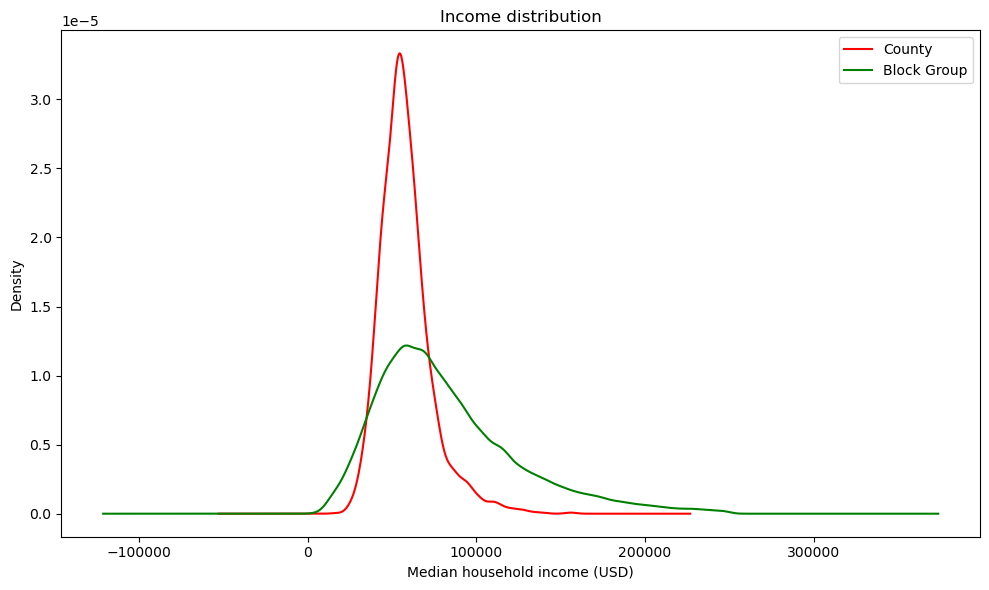

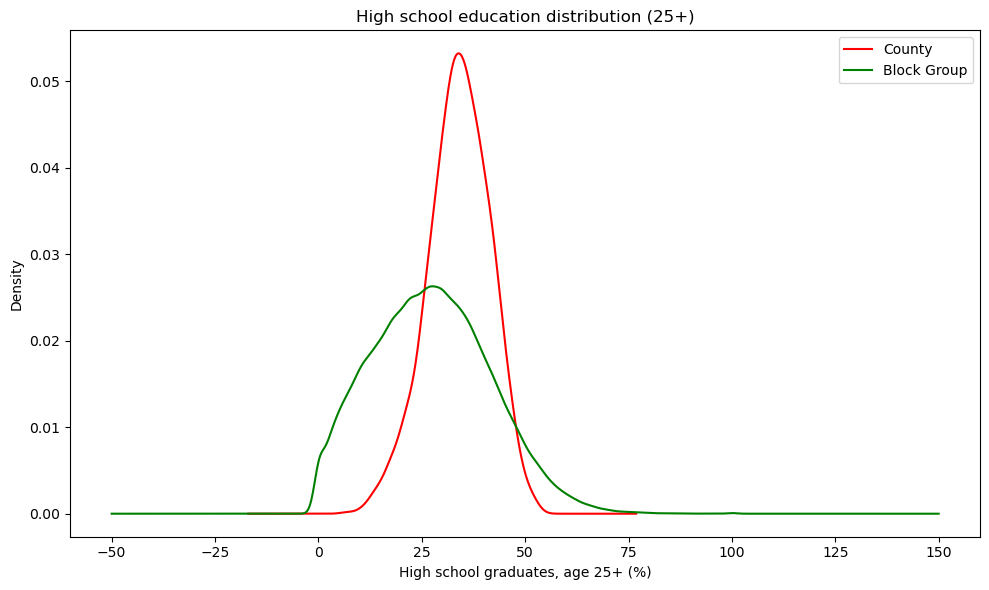

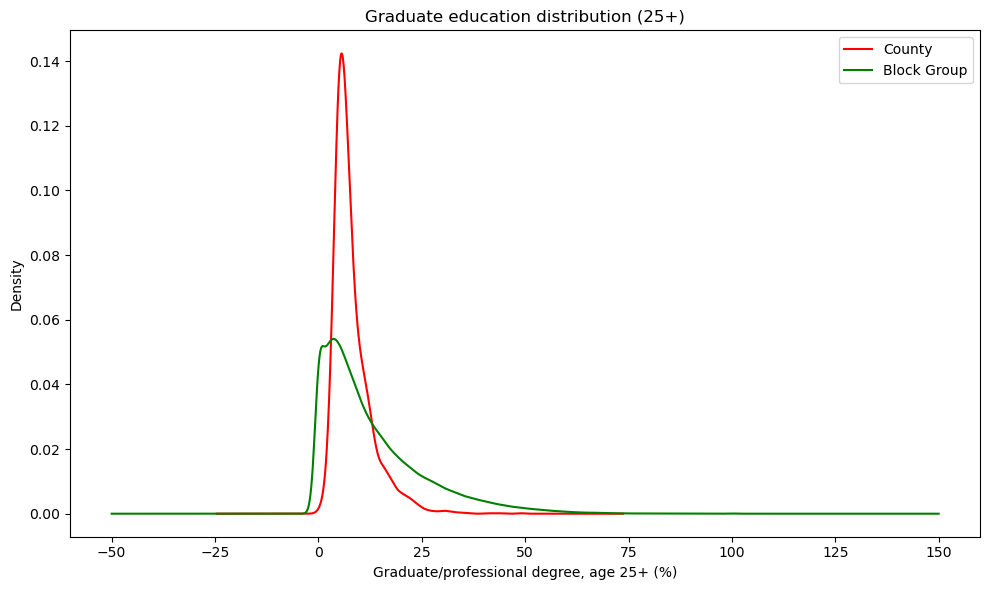

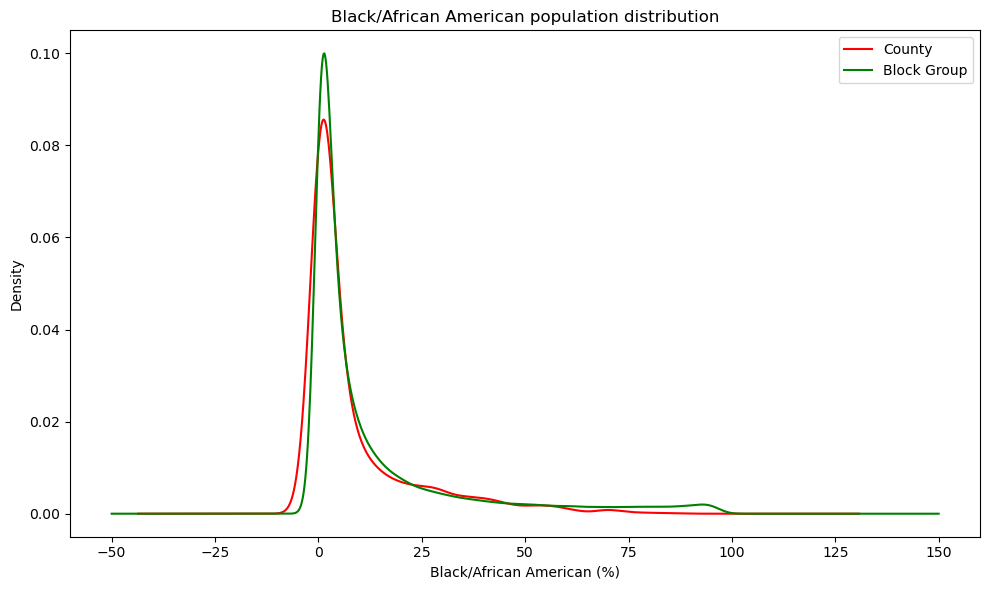

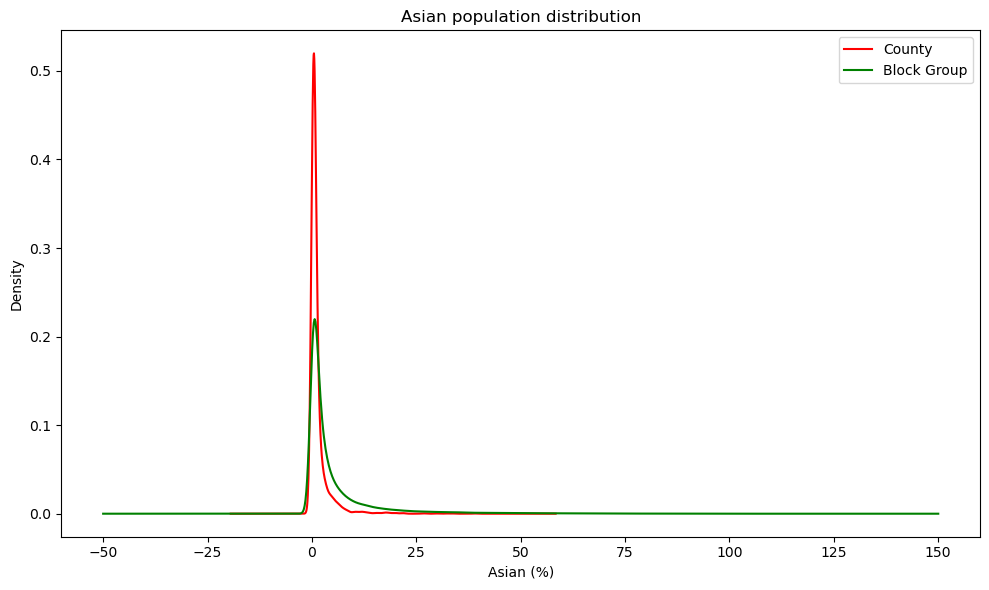

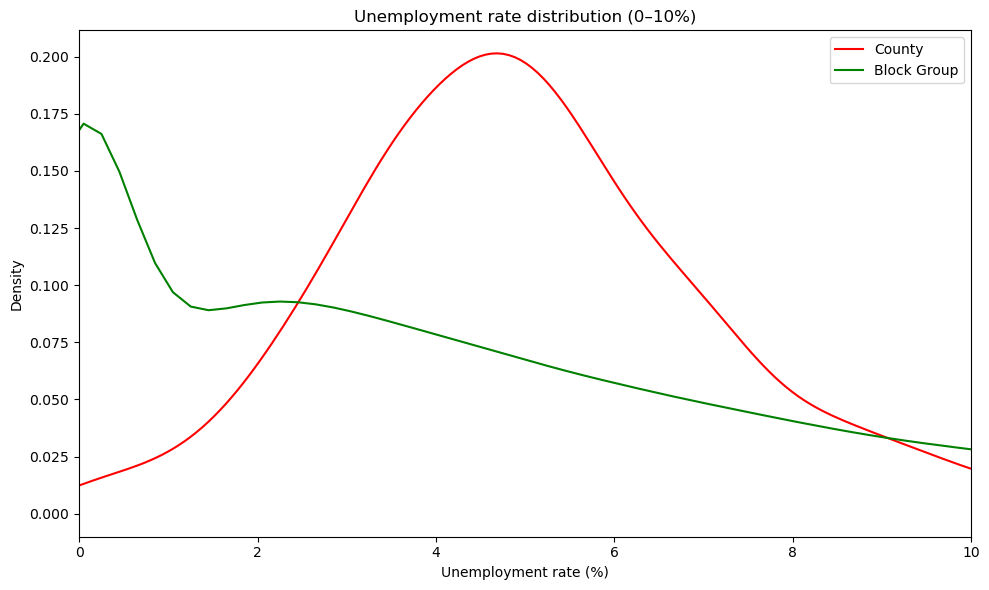

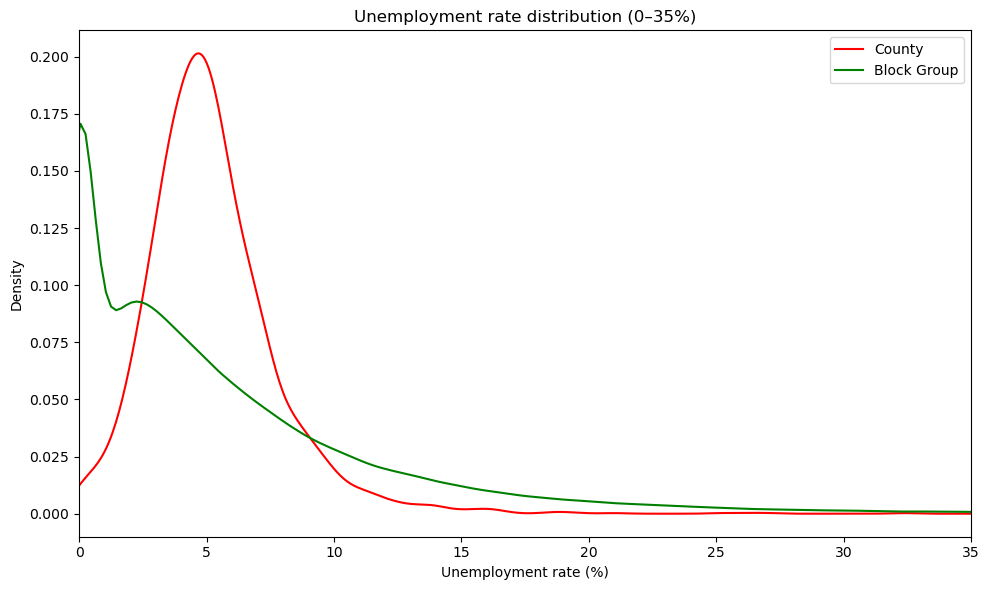

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

factors = ["Income", "HS_Education", "Grad_Education", "Black", "Asian", "Unemployment"]

FACTOR_LABELS = {
    "Income": "Median household income (USD)",
    "HS_Education": "High school graduates, age 25+ (%)",
    "Grad_Education": "Graduate/professional degree, age 25+ (%)",
    "Black": "Black/African American (%)",
    "Asian": "Asian (%)",
    "Unemployment": "Unemployment rate (%)",
}

TITLE_LABELS = {
    "Income": "Income distribution",
    "HS_Education": "High school education distribution (25+)",
    "Grad_Education": "Graduate education distribution (25+)",
    "Black": "Black/African American population distribution",
    "Asian": "Asian population distribution",
    "Unemployment": "Unemployment rate distribution",
}

def safe_series(df, col, *, level=None):
    if df is None or col not in df.columns:
        return None

    s = pd.to_numeric(df[col], errors="coerce").dropna()

    # Unemployment: BG is typically 0–1, convert to percent for plotting
    if col == "Unemployment" and level == "bg":
        if s.max() <= 1.5:
            s = s * 100

    if len(s) < 10 or s.nunique() < 2:
        return None

    return s

def plot_factor_kde(factor, *, xlim=None, title=None, xlabel=None):
    fig, ax = plt.subplots(figsize=(10, 6))

    cty = safe_series(cty_social_small, factor, level="county")
    bg  = safe_series(bg_social, factor, level="bg")

    if cty is not None:
        cty.plot(kind="kde", ax=ax, color="red", label="County")
    if bg is not None:
        bg.plot(kind="kde", ax=ax, color="green", label="Block Group")

    # Clear axis titles (units-aware)
    ax.set_ylabel("Density")
    ax.set_xlabel(xlabel if xlabel is not None else FACTOR_LABELS.get(factor, factor))

    # Clear plot titles
    default_title = TITLE_LABELS.get(factor, f"{factor} distribution")
    ax.set_title(title if title is not None else default_title)

    if xlim is not None:
        ax.set_xlim(xlim)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend()

    plt.tight_layout()
    plt.show()

# Plot all except unemployment first
for factor in ["Income", "HS_Education", "Grad_Education", "Black", "Asian"]:
    plot_factor_kde(factor)

# Unemployment with explicit ranges
plot_factor_kde("Unemployment", xlim=(0, 10), title="Unemployment rate distribution (0–10%)")
plot_factor_kde("Unemployment", xlim=(0, 35), title="Unemployment rate distribution (0–35%)")

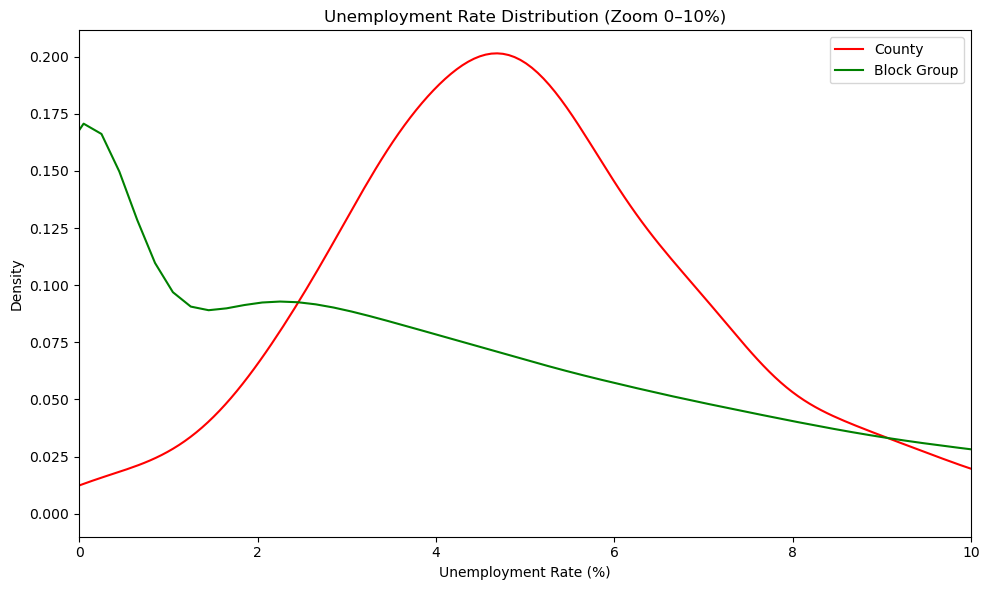

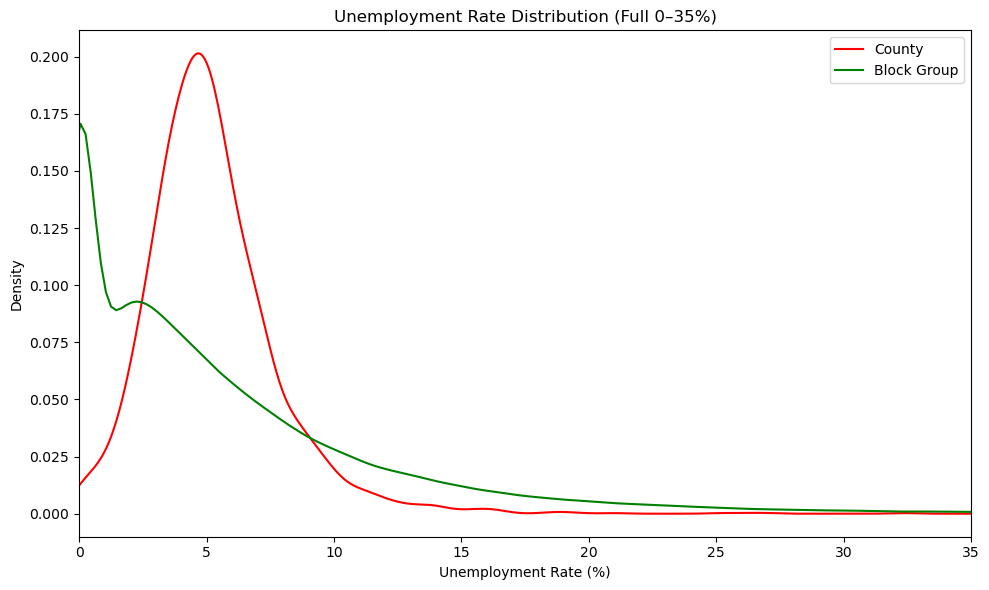

In [43]:
plot_factor_kde("Unemployment", xlim=(0, 10),  title="Unemployment Rate Distribution (Zoom 0–10%)",  xlabel="Unemployment Rate (%)")
plot_factor_kde("Unemployment", xlim=(0, 35),  title="Unemployment Rate Distribution (Full 0–35%)",   xlabel="Unemployment Rate (%)")

In [44]:
def sanity(s, name):
    s = pd.to_numeric(s, errors="coerce")
    print(
        name,
        "min", s.min(),
        "p50", s.quantile(0.5),
        "p90", s.quantile(0.9),
        "max", s.max(),
        "%==0", (s == 0).mean(),
        "%nan", s.isna().mean(),
        "%<=1", (s <= 1).mean(),
        "%<=100", (s <= 100).mean(),
    )

sanity(cty_social["Unemployment Rate"], "County unemp rate (already %)")
sanity(bg_unemp["Unemployment Rate"] * 100, "BG unemp rate (% after x100)")

County unemp rate (already %) min 0.0 p50 4.9 p90 8.2 max 32.4 %==0 0.00704 %nan 0.00608 %<=1 0.02432 %<=100 0.99392
BG unemp rate (% after x100) min 0.0 p50 3.67647058823529 p90 13.602589548040253 max 100.0 %==0 0.2163483758087944 %nan 0.010588604251947709 %<=1 0.2552901756239271 %<=100 0.9894113957480523
